# Spaceship Titanic with TFDF( TensorFlow Digital Forest API)

##

##### This notebook walks you through how to train a baseline Random Forest model using TensorFlow Decision Forests on the Spaceship Titanic dataset made available for this competition.

#

In [106]:
import tensorflow_decision_forests as tfdf
import pandas as pd

dataset = pd.read_csv("sample_submission.csv")
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, label="Transported")

model = tfdf.keras.RandomForestModel()
model.fit(tf_dataset)

print(model.summary())

Use /var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/tmp6ae7hnko as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.065653. Found 4277 examples.
Training model...
Model trained in 0:00:00.047959
Compiling model...
Model compiled.
Model: "random_forest_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (1):
	PassengerId

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:

Variable Importance: NUM_AS_ROOT:

Variable Importance: NUM_NODES:

Variable Importance: SUM_SCORE:



Winner takes all: true
Out-of-bag evaluation: accuracy:1 logloss:0
Number of trees: 300
Total number of nodes: 300

Number of nodes by tree:
Count: 300

[INFO 23-09-23 17:31:17.2281 PDT kernel.cc:1243] Loading model from path /var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/tmp6ae7hnko/model/ with prefix 9d4016d0bb274a71
[WARNING 23-09-23 17:31:17.2286 PDT utils.cc:73] The model does not have any input features i.e. the model is constant and will always return the same prediction.
[INFO 23-09-23 17:31:17.2287 PDT decision_forest.cc:660] Model loaded with 300 root(s), 300 node(s), and 0 input feature(s).
[INFO 23-09-23 17:31:17.2287 PDT abstract_model.cc:1312] Engine "RandomForestGeneric" built
[INFO 23-09-23 17:31:17.2287 PDT kernel.cc:1075] Use fast generic engine


#

## Import the Library

In [41]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.13.0
TensorFlow Decision Forests v1.5.0


#

## Load the Data 

In [43]:
dataset_df = pd.read_csv("train.csv")
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (8693, 14)


#

##### The data is composed of 14 columns and 8693 entries. Now let's try printing out the first 5 entries.

In [44]:
dataset_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#

##### There are 12 feature columns. Using these features the model has to predict whether the passenger is rescued or not indicated by the column ```Transported```.

#

## Let do basic exploration of the dataset

In [45]:
dataset_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [57]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


## Bar chart for label column: Transported

<Axes: >

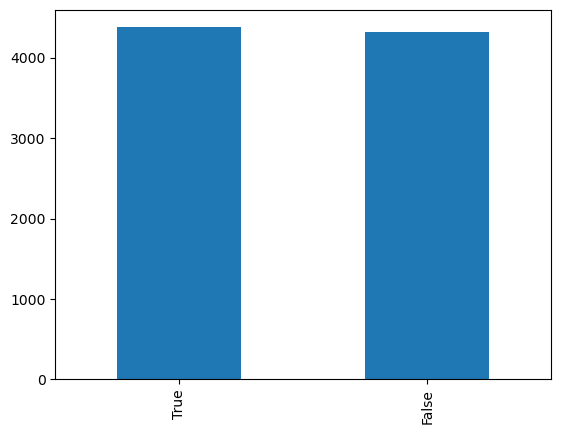

In [47]:
plot_df = dataset_df.Transported.value_counts()
plot_df.plot(kind="bar")

## Normal data Distribution 

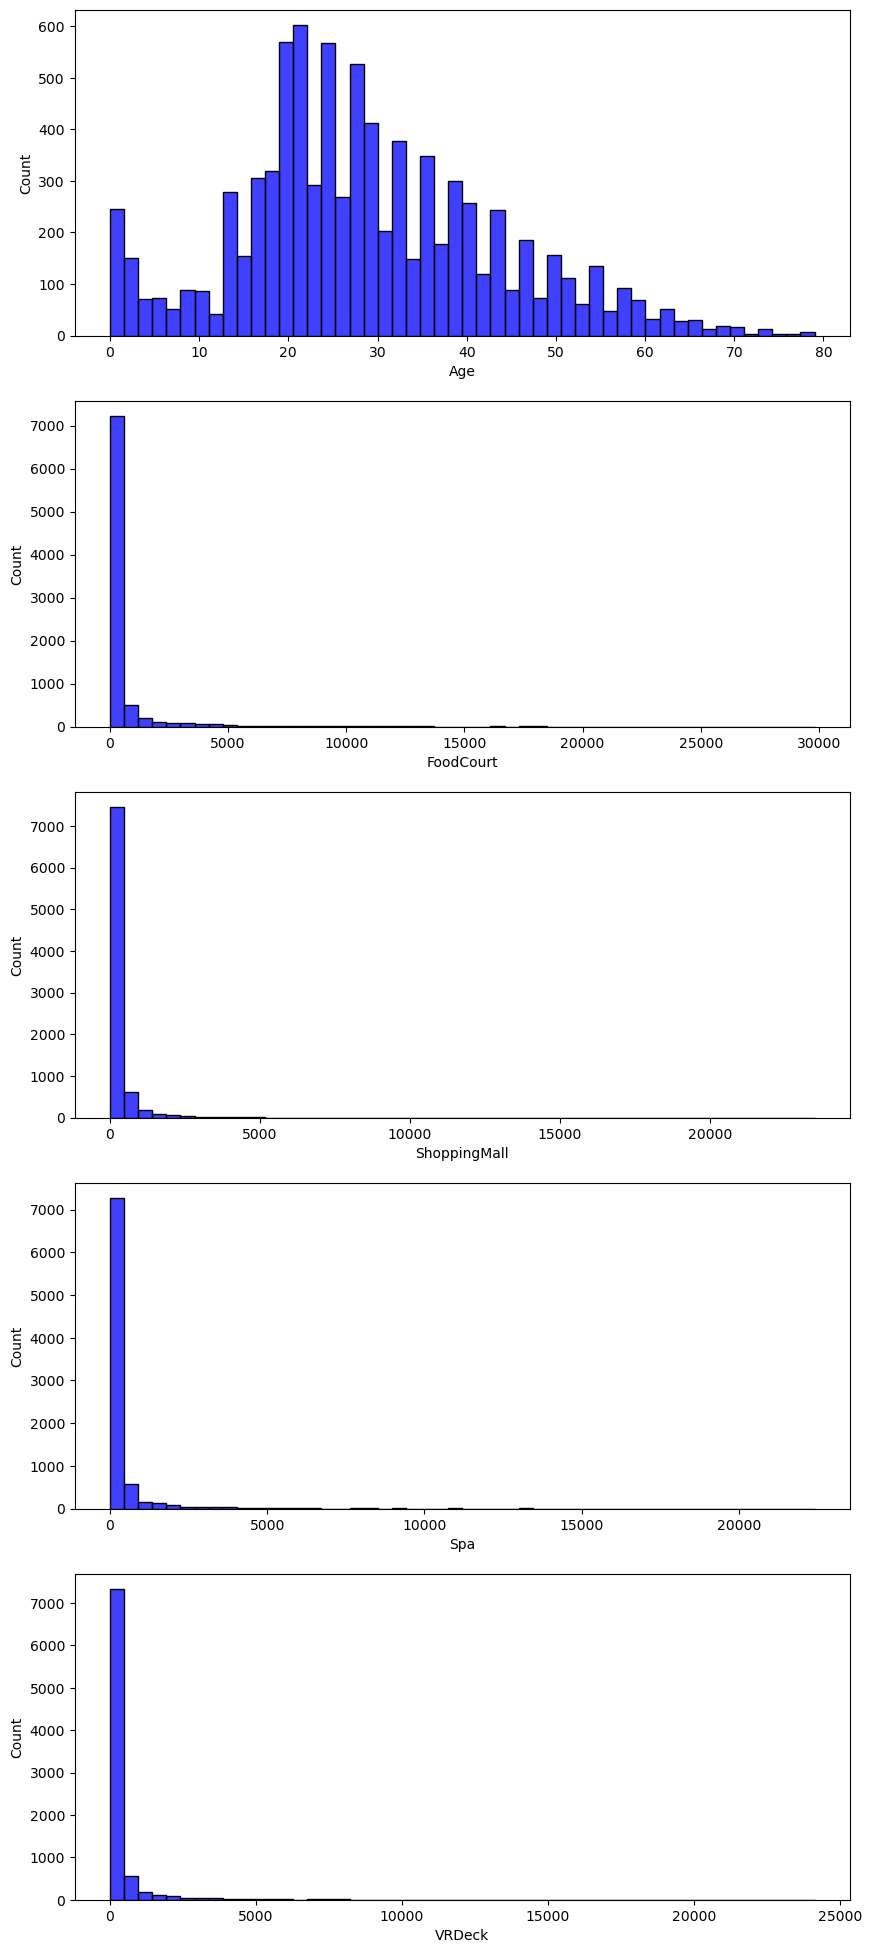

In [48]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(dataset_df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(dataset_df['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(dataset_df['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(dataset_df['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(dataset_df['VRDeck'], color='b', bins=50, ax=ax[4]);

## Prepare the DataSet 

#

### Drop both PassengerId and Name columns as they are not necessary for model training.

In [65]:
print(dataset_df.columns)
dataset_df.head(5)

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


### Check for the missing values Cols

In [85]:
cols_with_missing = [col for col in dataset_df.columns if dataset_df[col].isnull().any()]
cols_with_missing = sorted(cols_with_missing, reverse=True)  # Sort the list in descending order
print(cols_with_missing)

['VRDeck', 'VIP', 'Spa', 'ShoppingMall', 'RoomService', 'HomePlanet', 'FoodCourt', 'Destination', 'CryoSleep', 'Cabin', 'Age']


### Numerical Visualizing 

In [84]:
dataset_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

#

##### This dataset contains a mix of numeric, categorical and missing features. TF-DF supports all these feature types natively, and no preprocessing is required. 

##### But this datatset also has boolean fields with missing values. TF-DF doesn't support boolean fields yet. So we need to convert those fields into int. To account for the missing values in the boolean fields, we will replace them with zero. In this notebook, we will replace null value entries with zero for numerical columns as well and only let TF-DF handle the missing values in categorical columns. 

##### Note: You can choose to let TF-DF handle missing values in numerical columns if need be.

In [89]:
dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
dataset_df.isnull().sum().sort_values(ascending=False )

HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

#

##### Since, TF-DF cannot handle boolean columns, we will have to adjust the labels in column ```Transported``` to convert them into the integer format that TF-DF expects.

In [90]:
label = "Transported"
dataset_df[label] = dataset_df[label].astype(int)

#

##### We will also convert the boolean fields CryoSleep and VIP to int.

In [91]:
dataset_df['VIP'] = dataset_df['VIP'].astype(int)
dataset_df['CryoSleep'] = dataset_df['CryoSleep'].astype(int)

#

##### The value of column Cabin is a string with the format Deck/Cabin_num/Side. Here we will split the Cabin column and create 3 new columns Deck, Cabin_num and Side, since it will be easier to train the model on those individual data.


In [92]:
dataset_df[["Deck", "Cabin_num", "Side"]] = dataset_df["Cabin"].str.split("/", expand=True)

#

##### Remove original Cabin column from the dataset since it's not needed anymore.

In [93]:
try:
    dataset_df = dataset_df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

In [97]:
dataset_df.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


#

##### Now let us split the dataset into training and testing datasets:

In [100]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

6929 examples in training, 1764 examples in testing.


#

##### There's one more step required before we can train the model. We need to convert the datatset from Pandas format (pd.DataFrame) into TensorFlow Datasets format (tf.data.Dataset).

##### TensorFlow Datasets is a high performance data loading library which is helpful when training neural networks with accelerators like GPUs and TPUs.

In [111]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

#

##### Select a Model There are several tree-based models for you to choose from.
##### RandomForestModeL, GradientBoostedTreesModel, GartModel, DistributedGradientBoostedTreesModel
##### To start, we'll work with a Random Forest. This is the most well-known of the Decision Forest training algorithms. 

##### A Random Forest is a collection of decision trees, each trained independently on a random subset of the training dataset (sampled with replacement). The algorithm is unique in that it is robust to overfitting, and easy to use

In [112]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

#

### Configure the Model

In [115]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1")

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/tmp3wprmlgg as temporary training directory


#

### Create a Random Forest

In [116]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=["accuracy"]) # Optional, you can use this to include a list of eval metrics

Use /var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/tmpxhp63gpf as temporary training directory


#

### Train the model
##### We will train the model using a one-liner.

In [117]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.222076. Found 6929 examples.
Training model...


[INFO 23-09-23 17:50:07.2670 PDT kernel.cc:1243] Loading model from path /var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/tmpxhp63gpf/model/ with prefix cb5e3b806b9b4ce1


Model trained in 0:00:16.883872
Compiling model...
Model compiled.


[INFO 23-09-23 17:50:07.5975 PDT decision_forest.cc:660] Model loaded with 300 root(s), 235252 node(s), and 13 input feature(s).
[INFO 23-09-23 17:50:07.5976 PDT abstract_model.cc:1312] Engine "RandomForestGeneric" built
[INFO 23-09-23 17:50:07.5976 PDT kernel.cc:1075] Use fast generic engine


#

### Visualize the model
##### One benefit of tree-based models is that we can easily visualize them. The default number of trees used in the Random Forests is 300. We can select a tree to display below.

In [119]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

#

### Evaluate the model on the Out of bag (OOB) data and the validation dataset
##### Before training the dataset we have manually seperated 20% of the dataset for validation named as valid_ds.

##### We can also use Out of bag (OOB) score to validate our RandomForestModel. To train a Random Forest Model, a set of random samples from training set are choosen by the algorithm and the rest of the samples are used to finetune the model.The subset of data that is not chosen is known as Out of bag data (OOB). OOB score is computed on the OOB data.

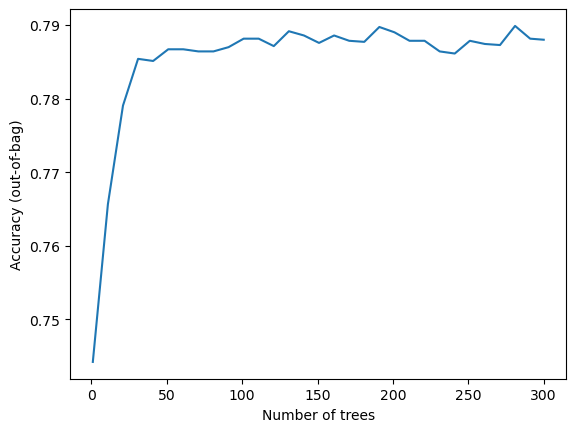

In [120]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

#

##### see some general stats on the OOB dataset

In [121]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6929, accuracy=0.7879924953095685, loss=0.5367738287767557, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [122]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 37ms/step - loss: 0.0000e+00 - accuracy: 0.8101
loss: 0.0000
accuracy: 0.8101


#

### Variable importances
##### Variable importances generally indicate how much a feature contributes to the model predictions or quality. There are several ways to identify important features using TensorFlow Decision Forests. Let us list the available Variable Importances for Decision Trees:

In [123]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


#

##### As an example, let us display the important features for the Variable Importance NUM_AS_ROOT.
##### The larger the importance score for NUM_AS_ROOT, the more impact it has on the outcome of the model.
##### By default, the list is sorted from the most important to the least. From the output you can infer that the feature at the top of the list is used as the root node in most number of trees in the random forest than any other feature.

In [124]:
# Each line is: (feature name, (index of the feature), importance score)
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #2), 123.0),
 ("RoomService" (1; #7), 55.0),
 ("Spa" (1; #10), 54.0),
 ("VRDeck" (1; #12), 32.0),
 ("FoodCourt" (1; #5), 17.0),
 ("ShoppingMall" (1; #8), 15.0),
 ("Deck" (4; #3), 3.0),
 ("HomePlanet" (4; #6), 1.0)]

#

### Submission

In [125]:
# Load the test dataset
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
submission_id = test_df.PassengerId

# Replace NaN values with zero
test_df[['VIP', 'CryoSleep']] = test_df[['VIP', 'CryoSleep']].fillna(value=0)

# Creating New Features - Deck, Cabin_num and Side from the column Cabin and remove Cabin
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
test_df = test_df.drop('Cabin', axis=1)

# Convert boolean to 1's and 0's
test_df['VIP'] = test_df['VIP'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)

# Convert pd dataframe to tf dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

# Get the predictions for testdata
predictions = rf.predict(test_ds)
n_predictions = (predictions > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/spaceship-titanic/test.csv'

In [126]:
sample_submission_df = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
sample_submission_df['Transported'] = n_predictions
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/spaceship-titanic/sample_submission.csv'